#### Prepared By:
- Mirette Amin    20190570
- Nader Atef      20190575

**2 Documents about Art**
- The first one: Child speaking about Art
- The Second one: Art Article

In [2]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt

# Deep learning:
# from tensorflow.python.keras.models import Input

from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from keras.models import Model
import tensorflow as tf


# from keras.models import Input, Model

from scipy import sparse

In [3]:
texts1 = pd.read_csv("short_reading1.csv", on_bad_lines="skip")

texts1 = [x for x in texts1["text"]]
print(len(texts1))
print(texts1)

texts2 = pd.read_csv("short_reading2.csv", on_bad_lines="skip")

texts2 = [x for x in texts2["text"]]
print(len(texts2))
print(texts2)

23
['This is a picture by my friend Linda.', 'It shows a lively scene outdoors.', 'I think she used bright pastels on white paper.', "Linda's picture is so colourful.", "In the background there's a big blue sky.", "It's a sunny day. There are some tall buildings which are all different colours and shapes.", "In the foreground the grass is bright green and there's a path going up to the buildings.", "Maybe it's the park near her house?", "There are so many details in Linda's picture too.", "On the left there's a multicoloured cat with pointy ears.", "In the middle, there's a small blue cat with zigzag stripes on its tail.", "Above the cats there's a butterfly, flying around in the sunshine.", 'Can you see the coloured spots on its wings? I like the yellow cat most of all.', 'It looks a bit like a castle!', 'I love this picture because every time I look at it, I see different things.', 'At first I thought there were only buildings in the background, but then I noticed the butterfly! Lind

In [4]:
def text_preprocessing(
    text: list,
    punctuations=r"""!()-[]{};:'"\,<>./?@#$%^&*_“~""",
    stop_words=[
        "and",
        "a",
        "is",
        "the",
        "in",
        "be",
        "will",
        "was",
        "but",
        "this",
        "were",
        "with",
        "of",
        "also",
        "on",
        ".",
        "for",
        "any",
        "its",
        "and",
        "are",
        "from",
        "both",
        "as",
        "by",
        "her",
        "your",
        "us",
        "my",
        "his",
        "its",
        "our",
        "ours",
        "yours",
        "their",
        "she",
        "he",
        "it",
        "we",
        "they",
        "i",
        "you",
        "some",
        "up",
        "to",
        "which",
        "where",
        "all",
        "that",
        "those",
        "these",
        "very",
        "has",
        "have",
        "do",
        "what",
        "who",
        "if",
        "not",
        "nor",
        "either",
        "neither",
        "whom",
        "because",
        "theres",
        "every",
        "between",
        "only",
        "can",
        "here",
        "there" "much",
        "always",
        "as",
        "somewhat",
        "somehow",
        "such",
        "than",
        "then",
        "ever"
    ],
) -> list:
    """
    A method to preproces text
    """
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r"\w*\d\w*", "", text)

    # Removing digits
    text = re.sub(r"[0-9]+", "", text)

    # Cleaning the whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list
    text = text.split(" ")

    # Droping empty strings
    text = [x for x in text if x != ""]

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text


def create_unique_word_dict(text: list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({word: i})

    return unique_word_dict


def CreateModel(XX, YY):
    # Defining the size of the embedding
    embed_size = 2
    # Defining the neural network

    # inp = Input(shape=(X.shape[1],))
    inp = Input(shape=XX.shape[1])  # 21
    x = Dense(units=embed_size, activation="linear")(inp)
    # x = Dense(units=21, activation='softmax')(x)
    x = Dense(units=YY.shape[1], activation="softmax")(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(loss="categorical_crossentropy", optimizer="adam")
    model.summary()
    return model

Short Document 1


In [10]:
window = 5

# Creating a placeholder for the scanning of the word list
word_lists1 = []
all_text1 = []
for text in texts1:

    # Cleaning the text
    text = text_preprocessing(text)
    # print (text)

    # Appending to the all text list
    all_text1 += text

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text):
                word_lists1.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words
            if i - w - 1 >= 0:
                word_lists1.append([word] + [text[(i - w - 1)]])

word_lists1

unique_word_dict1 = create_unique_word_dict(all_text1)
# Defining the number of features (unique words)
n_words1 = len(unique_word_dict1)
print(unique_word_dict1)

# Getting all the unique words
words1 = list(unique_word_dict1.keys())
print(words1)
print(n_words1)

{'about': 0, 'above': 1, 'adventures': 2, 'around': 3, 'at': 4, 'background': 5, 'big': 6, 'bird': 7, 'bit': 8, 'blue': 9, 'breakfast': 10, 'bright': 11, 'buildings': 12, 'butterfly': 13, 'castle': 14, 'cat': 15, 'cats': 16, 'cheerful': 17, 'clear': 18, 'coloured': 19, 'colourful': 20, 'colours': 21, 'could': 22, 'dark': 23, 'day': 24, 'details': 25, 'different': 26, 'ears': 27, 'eating': 28, 'everyone': 29, 'feel': 30, 'first': 31, 'flying': 32, 'foreground': 33, 'friend': 34, 'fun': 35, 'give': 36, 'going': 37, 'grass': 38, 'green': 39, 'happens': 40, 'happy': 41, 'house': 42, 'id': 43, 'imagination': 44, 'isnt': 45, 'kitchen': 46, 'large': 47, 'left': 48, 'light': 49, 'like': 50, 'linda': 51, 'lindas': 52, 'lively': 53, 'look': 54, 'looks': 55, 'lot': 56, 'love': 57, 'magic': 58, 'make': 59, 'makes': 60, 'many': 61, 'maybe': 62, 'me': 63, 'middle': 64, 'mornings': 65, 'most': 66, 'much': 67, 'multicoloured': 68, 'near': 69, 'noticed': 70, 'number': 71, 'once': 72, 'other': 73, 'outd

In [11]:
window = 5

# Creating a placeholder for the scanning of the word list
word_lists2 = []
all_text2 = []
for text in texts2:

    # Cleaning the text
    text = text_preprocessing(text)
    # print (text)

    # Appending to the all text list
    all_text2 += text

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text):
                word_lists2.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words
            if i - w - 1 >= 0:
                word_lists2.append([word] + [text[(i - w - 1)]])

word_lists2

unique_word_dict2 = create_unique_word_dict(all_text2)
# Defining the number of features (unique words)
n_words2 = len(unique_word_dict2)
print(unique_word_dict2)

# Getting all the unique words
words2 = list(unique_word_dict2.keys())
print(words2)
print(n_words2)

{'abilities': 0, 'ability': 1, 'according': 2, 'acquires': 3, 'activities': 4, 'activity': 5, 'allows': 6, 'an': 7, 'art': 8, 'artists': 9, 'arts': 10, 'attribute': 11, 'attributes': 12, 'away': 13, 'beauty': 14, 'being': 15, 'better': 16, 'box': 17, 'brain': 18, 'breakthroughs': 19, 'century”': 20, 'challenges': 21, 'child': 22, 'children': 23, 'children’s': 24, 'colors': 25, 'create': 26, 'creating': 27, 'creative': 28, 'creatively': 29, 'creativity': 30, 'critical': 31, 'cultures': 32, 'day': 33, 'deal': 34, 'development': 35, 'difficult': 36, 'disciplines': 37, 'discord': 38, 'discover': 39, 'drawing': 40, 'educators': 41, 'effectively': 42, 'emotions': 43, 'employ': 44, 'encourages': 45, 'engage': 46, 'engaged': 47, 'enjoy': 48, 'everyone': 49, 'experiment': 50, 'exposed': 51, 'expression': 52, 'extinctions': 53, 'face': 54, 'factors': 55, 'families': 56, 'fine': 57, 'fingers': 58, 'fire': 59, 'foundation': 60, 'front': 61, 'fun': 62, 'gives': 63, 'global': 64, 'governments': 65, 

In [12]:
unique_word_dict = create_unique_word_dict(all_text1 + all_text2)
# Defining the number of features (unique words)
n_words = len(unique_word_dict)
print(unique_word_dict)

{'abilities': 0, 'ability': 1, 'about': 2, 'above': 3, 'according': 4, 'acquires': 5, 'activities': 6, 'activity': 7, 'adventures': 8, 'allows': 9, 'an': 10, 'around': 11, 'art': 12, 'artists': 13, 'arts': 14, 'at': 15, 'attribute': 16, 'attributes': 17, 'away': 18, 'background': 19, 'beauty': 20, 'being': 21, 'better': 22, 'big': 23, 'bird': 24, 'bit': 25, 'blue': 26, 'box': 27, 'brain': 28, 'breakfast': 29, 'breakthroughs': 30, 'bright': 31, 'buildings': 32, 'butterfly': 33, 'castle': 34, 'cat': 35, 'cats': 36, 'century”': 37, 'challenges': 38, 'cheerful': 39, 'child': 40, 'children': 41, 'children’s': 42, 'clear': 43, 'colors': 44, 'coloured': 45, 'colourful': 46, 'colours': 47, 'could': 48, 'create': 49, 'creating': 50, 'creative': 51, 'creatively': 52, 'creativity': 53, 'critical': 54, 'cultures': 55, 'dark': 56, 'day': 57, 'deal': 58, 'details': 59, 'development': 60, 'different': 61, 'difficult': 62, 'disciplines': 63, 'discord': 64, 'discover': 65, 'drawing': 66, 'ears': 67, 'e

In [13]:
# Getting all the unique words

unionVec = list(set(words1 + words2))
n_words = len(unique_word_dict)
word_lists = word_lists1 + word_lists2

X = []
Y = []
for i, word_list in enumerate(word_lists):
    # Getting the indices
    print(word_list)
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])
    # print (word_list)
    print(word_list[0], main_word_index)
    print(word_list[1], context_word_index)

    # Creating the placeholders
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
print(X)
print(Y)

XX = tf.convert_to_tensor(X, dtype=tf.float32)
YY = tf.convert_to_tensor(Y, dtype=tf.float32)
print(XX.shape)
print(YY.shape)

['picture', 'friend']
picture 183
friend 93
['picture', 'linda']
picture 183
linda 134
['friend', 'linda']
friend 93
linda 134
['friend', 'picture']
friend 93
picture 183
['linda', 'friend']
linda 134
friend 93
['linda', 'picture']
linda 134
picture 183
['shows', 'lively']
shows 208
lively 137
['shows', 'scene']
shows 208
scene 201
['shows', 'outdoors']
shows 208
outdoors 173
['lively', 'scene']
lively 137
scene 201
['lively', 'shows']
lively 137
shows 208
['lively', 'outdoors']
lively 137
outdoors 173
['scene', 'outdoors']
scene 201
outdoors 173
['scene', 'lively']
scene 201
lively 137
['scene', 'shows']
scene 201
shows 208
['outdoors', 'scene']
outdoors 173
scene 201
['outdoors', 'lively']
outdoors 173
lively 137
['outdoors', 'shows']
outdoors 173
shows 208
['think', 'used']
think 243
used 259
['think', 'bright']
think 243
bright 31
['think', 'pastels']
think 243
pastels 181
['think', 'white']
think 243
white 268
['think', 'paper']
think 243
paper 178
['used', 'bright']
used 259
brig

In [22]:
# Train on both Documents
model = CreateModel(XX, YY)
# Optimizing the network weights
model.fit(x=XX, y=YY, batch_size=20, epochs=550)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 275)]             0         
                                                                 
 dense_6 (Dense)             (None, 2)                 552       
                                                                 
 dense_7 (Dense)             (None, 275)               825       
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________
Epoch 1/550
133/133 [==============================] - 2s 8ms/step - loss: 5.6131
Epoch 2/550
133/133 [==============================] - 1s 6ms/step - loss: 5.5998
Epoch 3/550
133/133 [==============================] - 1s 4ms/step - loss: 5.5875
Epoch 4/550
133/133 [==============================] - 1s 5ms/step - loss: 

(275, 2)
-0.9341214
[[ 4.56065893e+00 -5.99444199e+00]
 [ 6.21272981e-01 -9.34121370e-01]
 [-6.56806111e-01  2.15506986e-01]
 [-2.47857666e+00  3.54703379e+00]
 [ 4.63598871e+00 -1.46075797e+00]
 [ 2.06883049e+00 -1.94455469e+00]
 [ 4.88887835e+00  2.73187685e+00]
 [ 8.57865715e+00 -4.63387191e-01]
 [-1.00674558e+00  5.28136492e-01]
 [ 3.05151272e+00  2.27765417e+00]
 [ 3.93138838e+00  6.53164238e-02]
 [-2.48061395e+00  3.54355145e+00]
 [ 3.38942242e+00  3.64757538e-01]
 [ 4.99845076e+00  3.62888646e+00]
 [ 2.33658624e+00 -1.86284971e+00]
 [-6.19704723e-01  3.53049660e+00]
 [ 2.00705385e+00  3.67567629e-01]
 [ 5.15811980e-01 -3.32783389e+00]
 [-4.42877960e+00 -6.82806778e+00]
 [-4.24641728e-01  1.54053164e+00]
 [ 5.52127504e+00  6.21202660e+00]
 [ 1.66473293e+00  6.29851401e-01]
 [ 4.38283730e+00  2.54900146e+00]
 [-9.46376622e-01 -1.07697314e-02]
 [-4.23493505e-01 -7.20955789e-01]
 [-7.00760841e+00  1.02211499e+00]
 [-8.84287536e-01 -1.09886205e+00]
 [-1.60948384e+00 -8.06182384e-01]


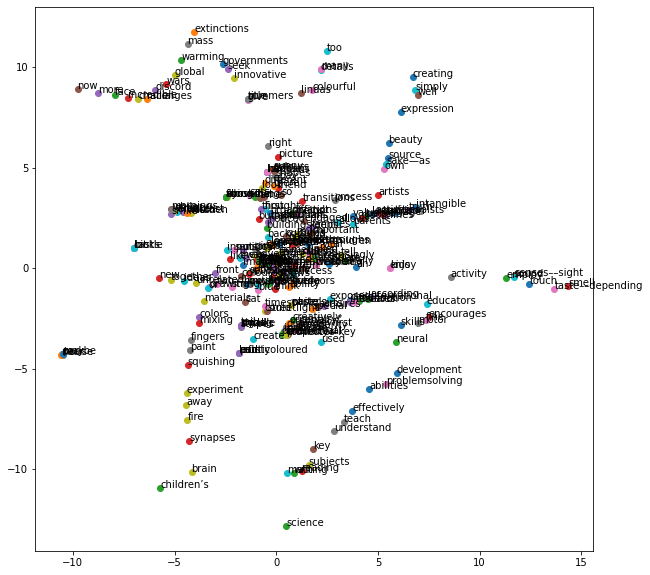

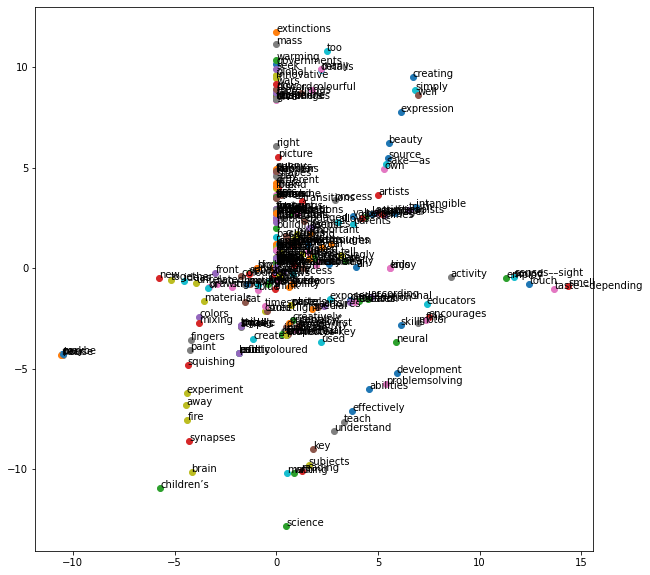

In [23]:
# The input layer

weights = model.get_weights()[0]
print(weights.shape)
print(weights[1][1])
print(weights)

# weights2 = model.get_weights2()[2]
# print (weights2)

# get the weight for each unique word
embedding_dict = {}
for (
    word
) in (
    unionVec
):  # to pick the a row of weight of two values for each unique word since weights2 = 21*2
    embedding_dict.update({word: weights[unique_word_dict.get(word)]})

print(embedding_dict)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
i = 0
for word in list(unique_word_dict.keys()):
    print(i, " >> ", word)
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))
    i = i + 1

# The input layer
weights = model.get_weights()[0]
# weights[: , 0] = 0
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
i = 0
for word in list(unique_word_dict.keys()):
    print(i, " >> ", word)
    # coord = embedding_dict.get(word)
    coord = embedding_dict.get(word)
    if weights[i][0] < 0 and weights[i][1] > 0:
        plt.scatter(0, weights[i][1])
        plt.annotate(word, (0, weights[i][1]))
    else:
        plt.scatter(weights[i][0], weights[i][1])
        plt.annotate(word, (weights[i][0], weights[i][1]))

        # plt.xlim(-0.5, 0.5)
        # plt.ylim(-0.5, 0.5)
        # plt.show()
    i = i + 1

In [24]:
# Cosine Similarity
doc1Embedding = np.mean([embedding_dict[w] for w in words1], axis=0)
doc2Embedding = np.mean([embedding_dict[w] for w in words2], axis=0)

res = np.dot(doc1Embedding, doc2Embedding) / (
    np.linalg.norm(doc1Embedding) * np.linalg.norm(doc2Embedding)
)

print("Cosine Similarity", res)

Cosine Similarity -0.5889224


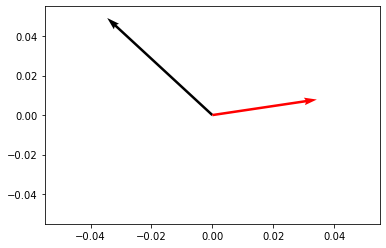

In [27]:
# Plotting Vectors
origin = np.array([[0, 0], [0, 0]])
plt.quiver(*origin, doc1Embedding, doc2Embedding, color=['black', 'red'], scale=4)
plt.show()